In [3]:
import os
import numpy as np
from numba import jit
import scipy.stats as stats

import seaborn as sns
import matplotlib as mpl
import matplotlib.cm as cm
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
from matplotlib.patches import Circle
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.animation as animation
from matplotlib.animation import FuncAnimation

from IPython.display import clear_output, display

In [2]:
figsave_dir = 'out\\'
figsave_format = 'pdf'
figsave_dpi = 200

# Scale for matplotlib scatter plots to show all bodies
s_scale = 1e8

# Set axtick dimensions
major_size = 6
major_width = 1.2
minor_size = 3
minor_width = 1
mpl.rcParams['xtick.major.size'] = major_size
mpl.rcParams['xtick.major.width'] = major_width
mpl.rcParams['xtick.minor.size'] = minor_size
mpl.rcParams['xtick.minor.width'] = minor_width
mpl.rcParams['ytick.major.size'] = major_size
mpl.rcParams['ytick.major.width'] = major_width
mpl.rcParams['ytick.minor.size'] = minor_size
mpl.rcParams['ytick.minor.width'] = minor_width

# Seaborn style settings
sns.set_style({'axes.axisbelow': True,
               'axes.edgecolor': '.8',
               'axes.facecolor': 'white',
               'axes.grid': True,
               'axes.labelcolor': '.15',
               'axes.spines.bottom': True,
               'axes.spines.left': True,
               'axes.spines.right': True,
               'axes.spines.top': True,
               'figure.facecolor': 'white',
               'font.family': ['sans-serif'],
               'font.sans-serif': ['Arial',
                'DejaVu Sans',
                'Liberation Sans',
                'Bitstream Vera Sans',
                'sans-serif'],
               'grid.color': '.8',
               'grid.linestyle': '--',
               'image.cmap': 'rocket',
               'lines.solid_capstyle': 'round',
               'patch.edgecolor': 'w',
               'patch.force_edgecolor': True,
               'text.color': '.15',
               'xtick.bottom': True,
               'xtick.color': '.15',
               'xtick.direction': 'in',
               'xtick.top': True,
               'ytick.color': '.15',
               'ytick.direction': 'in',
               'ytick.left': True,
               'ytick.right': True})

## sin(x)/x

In [4]:
def func1(X):
    
    return np.sin(X) / X

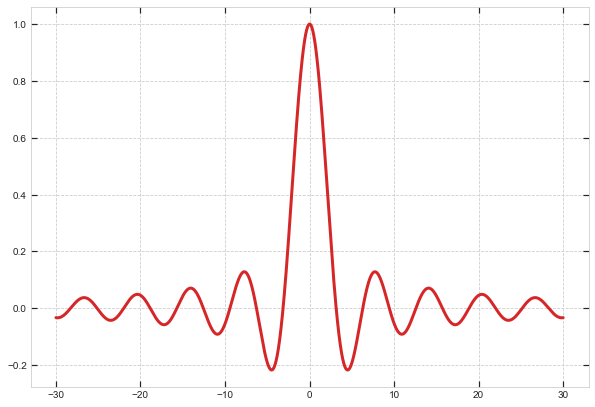

In [5]:
nrows = 1
ncols = 1
fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(ncols*10, nrows*7))

X = np.arange(-30,30,0.01)

axes.plot(X, func1(X),
          color='tab:red', lw=3)

plt.show()

## 1/e^(x - 1) - 1/x

In [6]:
def func2(X):
    
    return 1/(np.exp(X) - 1) - 1/X

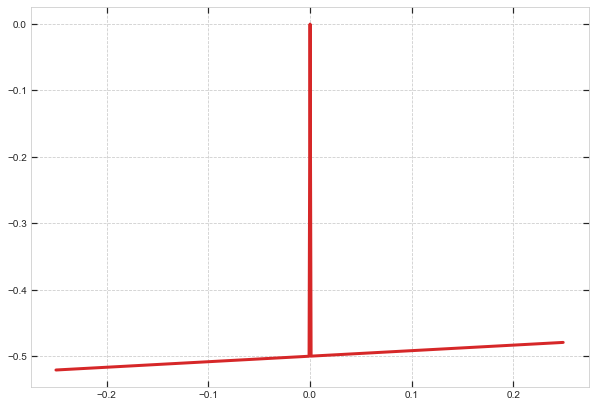

In [7]:
nrows = 1
ncols = 1
fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(ncols*10, nrows*7))

X = np.arange(-0.25,0.25,0.001)

axes.plot(X, func2(X),
          color='tab:red', lw=3)

plt.show()

## sin(x) + sin(y)

In [14]:
def func3(X, Y):
    
    return np.sin(X) + np.sin(Y)

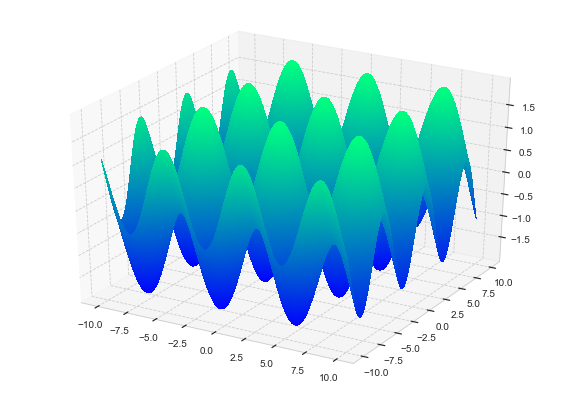

In [27]:
nrows = 1
ncols = 1
fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(ncols*10, nrows*7),
                         subplot_kw={'projection': '3d'})

x = np.arange(-10,10,0.05)
y = np.arange(-10,10,0.05)
X, Y = np.meshgrid(x,y)

axes.plot_surface(X, Y, func3(X, Y),
                  rstride=1, cstride=1, cmap='winter', linewidth=0, antialiased=False)

plt.show()

## Log

In [12]:
X = np.linspace(0.01,100,1000)
Y_1 = np.log(X)
Y_2 = np.log10(X)

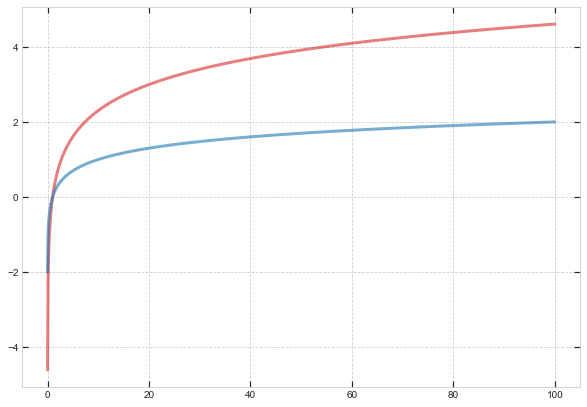

In [13]:
nrows = 1
ncols = 1
fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(ncols*10, nrows*7))

axes.plot(X, Y_1,
          color='tab:red', lw=3, alpha=0.6)
axes.plot(X, Y_2,
          color='tab:blue', lw=3, alpha=0.6)


plt.show()

## Probability distributions

In [37]:
nmin = 0
nmax = 20
a = np.arange(nmin, nmax+1)
lambda_ = [0.8, 4.25, 10.45]

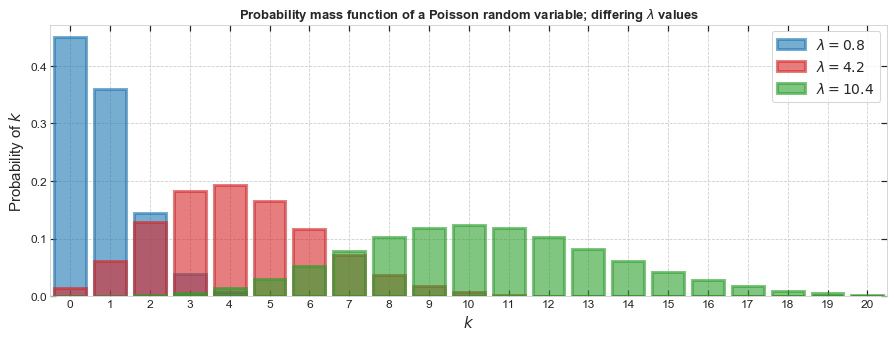

In [38]:
fig, axes = plt.subplots(figsize=(15, 5))

axestitlesize = 13
axeslabelsize = 15
axesticksize = 12
axislegendsize = 14

axes.bar(a, stats.poisson.pmf(a, lambda_[0]), color='tab:blue',
        label='$\lambda = {0:.1f}$'.format(lambda_[0]), alpha=0.60,
        edgecolor='tab:blue', lw=3)

axes.bar(a, stats.poisson.pmf(a, lambda_[1]), color='tab:red',
        label='$\lambda = {0:.1f}$'.format(lambda_[1]), alpha=0.60,
        edgecolor='tab:red', lw=3)

axes.bar(a, stats.poisson.pmf(a, lambda_[2]), color='tab:green',
        label='$\lambda = {0:.1f}$'.format(lambda_[2]), alpha=0.60,
        edgecolor='tab:green', lw=3)

axes.set_xlim(nmin-0.5, nmax+0.5)
axes.set_xticks(a)

axes.set_ylabel('Probability of $k$', fontsize=axeslabelsize)
axes.set_xlabel('$k$', fontsize=axeslabelsize)
axes.set_title('Probability mass function of a Poisson random variable; differing $\lambda$ values',
               fontsize=axestitlesize, fontweight='bold')

axes.tick_params(axis='both', which='major', labelsize=axesticksize)

axes.legend(loc='upper right', fontsize=axislegendsize)

plt.show()